In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Change directory
%cd /content/drive/My Drive/Colab Notebooks/healthcare analytics

/content/drive/My Drive/Colab Notebooks/healthcare analytics


In [6]:
!ls

AfterPCA1.csv  FinalRaw.csv		   PatientPortalUsage.ipynb
AfterPCA.csv   hints5_cycle2_public.csv    TimeSeries.ipynb
Dataset.csv    PatientPortalAnalysis.pptx


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split


In [8]:
df = pd.read_csv('Dataset.csv',parse_dates=True)
features = len(df.columns)
print(features)

19


In [52]:
print(df.shape[0])

241


In [53]:
print(df.head)

<bound method NDFrame.head of      SurgDate  DOW  T - 28  T - 21  T - 14  ...  T - 4  T - 3  T - 2  T - 1  Actual
0    10/10/11  Mon      38      45      60  ...     94     98    100    104     106
1    10/11/11  Tue      35      47      65  ...     99     99     99    114     121
2    10/12/11  Wed      26      43      54  ...    102    102    106    114     126
3    10/13/11  Thu      28      48      65  ...     94     97     98    103     114
4    10/14/11  Fri      31      40      50  ...     78     83     87     94     106
..        ...  ...     ...     ...     ...  ...    ...    ...    ...    ...     ...
236   9/10/12  Mon      33      49      68  ...    101    103    109    110     118
237   9/11/12  Tue      31      56      68  ...     97     98     98     99     108
238   9/12/12  Wed      39      49      69  ...     99    100    104    115     121
239   9/13/12  Thu      34      51      68  ...     99     97    101    106     114
240   9/14/12  Fri      27      41      63  ..

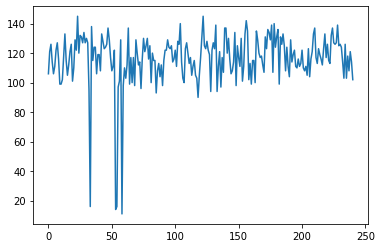

In [54]:
fig,ax=plt.subplots()
df['Actual'].plot(ax=ax)
plt.show()

# Check for Seasonality - patterns that repeat over a time

3 conditions for Stationary:
1. Trend is stationary
2. Variance is constant
3.Auto-correlation is constant

In [ ]:
# from pmdarima.datasets import load_lynx
# from pmdarima.arima.utils import nsdiffs

# # load lynx
# lynx = load_lynx()

# # estimate number of seasonal differences using a Canova-Hansen test
# D = nsdiffs(lynx,
#             m=52,  # commonly requires knowledge of dataset
#             max_D=12,
#             test='ch')  # -> 0


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


# Check for Stationary

In [55]:
#test for non-stationarity
#Null Hypothesis is time series is non stationary
#use Fuller test

from statsmodels.tsa.stattools import adfuller
results = adfuller(df['Actual'])
print(results)

(-5.152404073250107, 1.0987951103079959e-05, 5, 235, {'1%': -3.4584868856997004, '5%': -2.873918902362675, '10%': -2.573367247623359}, 1923.9318316966262)


0th element is test statistic - more negative it is - more likely the time series is stationary


Next element is p-value (if p-value is small (< 0.05) then reject the null hypothesis) 

In [ ]:
# Frequency for each day!
df.groupby('DOW').count()['Actual']

DOW
Fri    49
Mon    47
Thu    48
Tue    49
Wed    48
Name: Actual, dtype: int64

# Autocorrelation Plots

Index(['SurgDate', 'DOW', 'T - 28', 'T - 21', 'T - 14', 'T - 13', 'T - 12',
       'T - 11', 'T - 10', 'T - 9', 'T - 8', 'T - 7', 'T - 6', 'T - 5',
       'T - 4', 'T - 3', 'T - 2', 'T - 1', 'Actual'],
      dtype='object')


/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


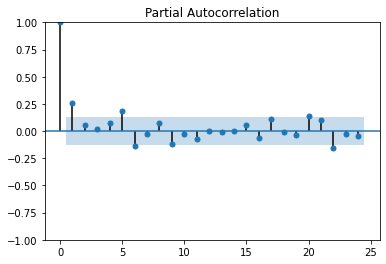

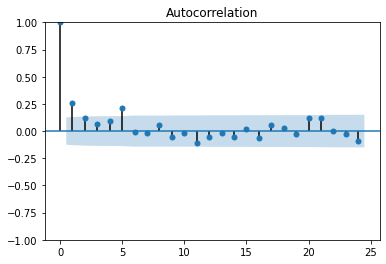

In [10]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# import matplotlib.pyplot as plt
# plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# # Original Series
# fig, axes = plt.subplots(3, 2, sharex=True)
# axes[0, 0].plot(df.Actual); axes[0, 0].set_title('Original Series')
# plot_acf(df.Actual, ax=axes[0, 1])

# # 1st Differencing
# axes[1, 0].plot(df.Actual.diff()); axes[1, 0].set_title('1st Order Differencing')
# plot_acf(df.Actual.diff().dropna(), ax=axes[1, 1])

# # 2nd Differencing
# axes[2, 0].plot(df.Actual.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
# plot_acf(df.Actual.diff().diff().dropna(), ax=axes[2, 1])

# plt.show()
print(df.columns)
plot_pacf(df['Actual'])
plt.show()
plot_acf(df['Actual'])
plt.show()

The straight line indicates - stationary model

**An autoregressive model** - we regress the values of time series,against previous values in the same time series

y = (a1* y') + e
where y and e are at time t and y' is at t-1

here e = eplison(shock term) is white noise and is random and unrelated to other shocks in the series
a1 = auto regressive coefficient at lag1

Order of AR model - number of auto regressive coefficients
Generally AR(p) - p auto regressive coefficients and p lags





In a **Moving Average** model - we regress the values of time series,against the previous shock values of the same time series

y = (m1*e')+ e where y is value at time t and is equal to m1 times the shock of previous step plus a shock term at current step - order of the model means how many lags we use - (q) in case of MA models

ARMA is modeled on previous terms and previous shock terms
 https://www.statisticshowto.com/arma-model/



1.   ARMA(p,q) - tells us about the order of AR & MA part
2.   Find the p and q terms
3.   Fit the ARMA model

Theory - https://www.baeldung.com/cs/acf-pacf-plots-arma-modeling



Partial autocorrelation can be imagined as the correlation between the series and its lag, after excluding the contributions from the intermediate lags. 
So, PACF sort of conveys the pure correlation between a lag and the series. 
This way, we will know if that lag is needed in the AR term or not.

q-3 and p-7

In Python, the pmdarima package provides auto_arima() function which can be used to automate the process of ARIMA Forecasting in Python.

auto_arima() uses a stepwise approach to search multiple combinations of p,d,q parameters and chooses the best model that has the least AIC.

We need to install the pmdarima package first

In [4]:
#!pip uninstall statsmodels 
!pip install pmdarima==1.8.2
#!pip install scipy

     |████████████████████████████████| 1.5 MB 5.6 MB/s 
  Attempting uninstall: pmdarima
    Found existing installation: pmdarima 1.8.4
    Uninstalling pmdarima-1.8.4:
      Successfully uninstalled pmdarima-1.8.4


## Train test Split (70 rows in test data)

In [11]:
from datetime import datetime
# df_train = df[(df['SurgDate'] <= '2012-07-31')]
# df_test = df[(df['SurgDate'] > '2012-07-31')]

# Create Training and Test
df_train = df['Actual'][:170]
df_test = df['Actual'][170:240]

#ARMA Model - Baseline Model

In [12]:
from statsmodels.tsa.arima_model import ARIMA

import pmdarima as pm

model = pm.auto_arima(df_train, start_p=1, start_q=1,
                      max_p=7, max_q=5, # maximum p and q
                      m=52,              # frequency of series
                      d=None,          
                      seasonal=False,   # Seasonality
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)


print(model.summary())

/usr/local/lib/python3.7/dist-packages/pmdarima/arima/_validation.py:62: UserWarning: m (52) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1508.616, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2102.012, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1567.313, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=1925.791, Time=0.07 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.33 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=inf, Time=0.27 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=inf, Time=0.13 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.04 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.19 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1490.484, Time=0.26 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1489.668, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1498.239, Time=0.01 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=1490.368, Time=0.14 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1488.528, Time=0.06 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1490.447, Time=0

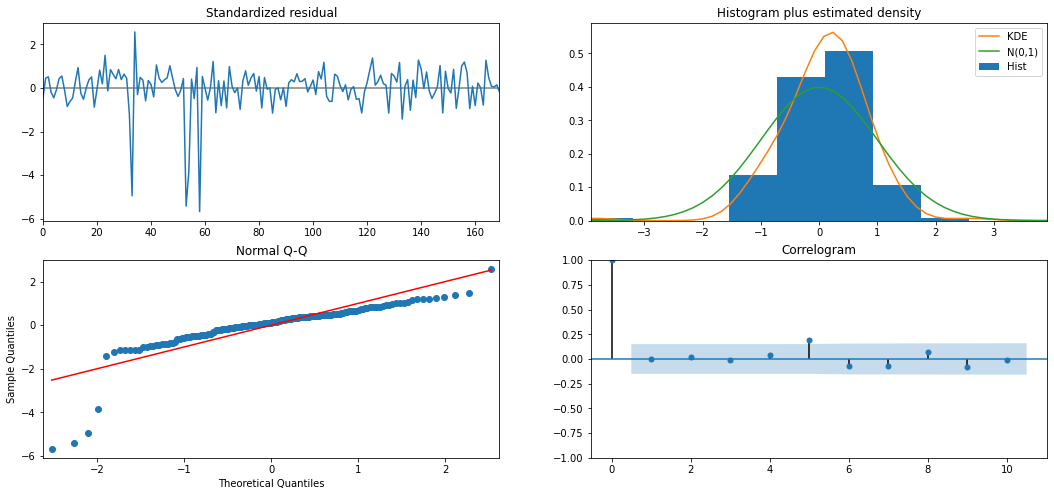

In [13]:
model.plot_diagnostics(figsize=(18,8))
plt.show()

Interpretation of plots in plot diagnostics
Standardized residual: The residual errors seem to fluctuate around a mean of zero and have a uniform variance.

Histogram: The density plot suggest normal distribution with mean slighlty shifted towards right.

Theoretical Quantiles: Mostly the dots fall perfectly in line with the red line. Any significant deviations would imply the distribution is skewed.

Correlogram: The Correlogram, (or ACF plot) shows the residual errors are not autocorrelated. The ACF plot would imply that there is some pattern in the residual errors which are not explained in the model. So we will need to look for more X’s (predictors) to the model.



## Evaluating the model performance with Forecast

Evaluation metrics


1.   the higher the R-squared, the better the model fits your data
2.   Lower values of RMSE indicate better fit. 



In [15]:
from sklearn.metrics import r2_score

# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    #acf1 = acf(fc-actual)[1]                      # ACF1
    r_2 = corr**2
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, #'acf1':acf1, 
            'corr':corr, 'minmax':minmax,'Rsquare':r_2})

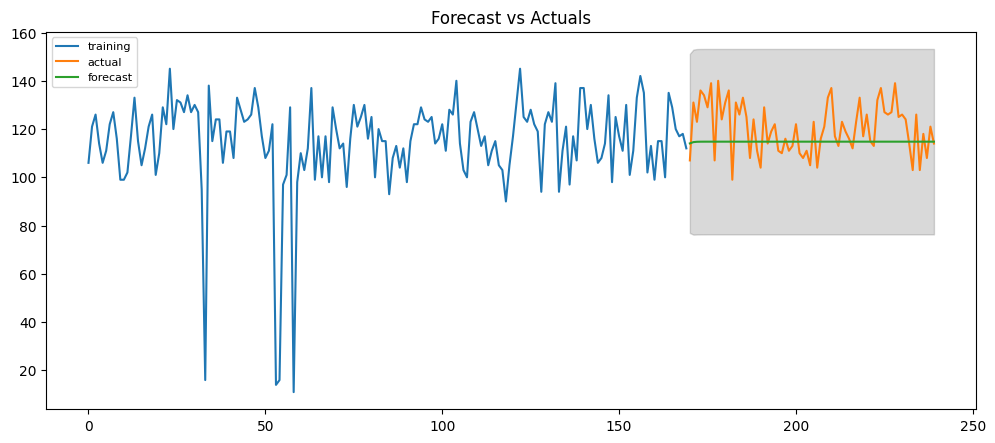

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  


{'Rsquare': 0.013310096881507149,
 'corr': 0.11536939317473742,
 'mae': 9.692846554746554,
 'mape': 0.07797642706211796,
 'me': -5.668091803407402,
 'minmax': 0.07651373654353266,
 'mpe': -0.03997331658187458,
 'rmse': 11.76799692713881}

In [17]:
# Forecast with Baseline
n_periods = 70
fc, conf = model.predict(n_periods=n_periods, return_conf_int=True)

# Make as pandas series
fc_series = pd.Series(fc, index=df_test.index)
lower_series = pd.Series(conf[:, 0], index=df_test.index)
upper_series = pd.Series(conf[:, 1], index=df_test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(df_train, label='training')
plt.plot(df_test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

# Accuracy metrics
forecast_accuracy(fc, df_test)

# ARMA Model with exogenous varaibles with T-7 to T-10

In [18]:


# SARIMAX Model without any seaonality
sxmodel = pm.auto_arima(df_train, exogenous=df[['T - 7', 'T - 8', 'T - 9', 'T - 10']][:170],
                      start_p=1, start_q=1,      
                      max_p=3, max_q=3, # maximum p and q
                      m=52,             # frequency of series
                      d=None,         
                      seasonal = False,
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(sxmodel.summary())

/usr/local/lib/python3.7/dist-packages/pmdarima/arima/_validation.py:62: UserWarning: m (52) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1247.180, Time=1.19 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1254.393, Time=0.15 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1253.378, Time=0.21 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=1252.883, Time=0.22 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=1249.179, Time=0.63 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=1249.183, Time=0.64 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=1253.387, Time=0.49 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=1254.547, Time=0.39 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.71 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.66 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0]          
Total fit time: 5.315 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  170
Model:               SARIMAX(1, 0, 1)   Log Likelihood                -6

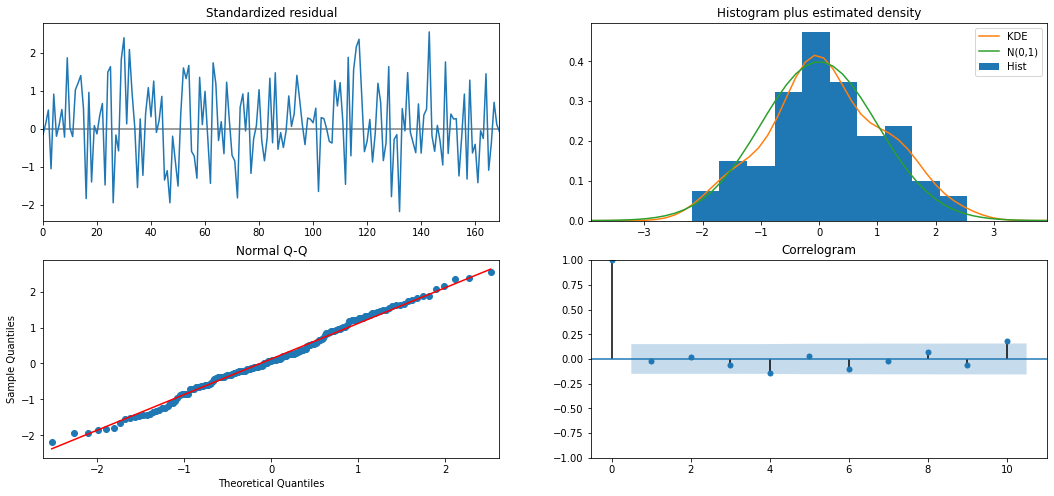

In [19]:
sxmodel.plot_diagnostics(figsize=(18,8))
plt.show()

## Evaluating Model Performane with Forecast (Exogenous Variables)

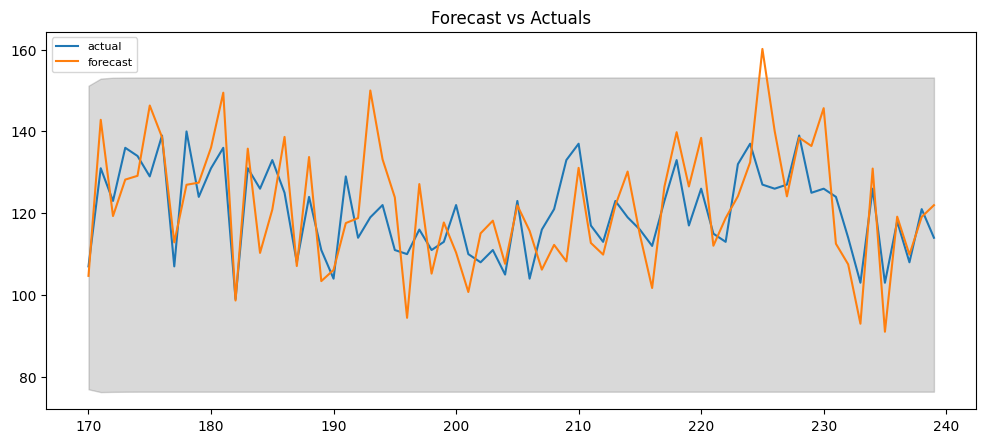

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  


{'Rsquare': 0.4887673653545756,
 'corr': 0.6991189922713984,
 'mae': 8.409185806292085,
 'mape': 0.06944767243456293,
 'me': 1.1713179035529298,
 'minmax': 0.06529824603097134,
 'mpe': 0.009656841101784872,
 'rmse': 10.608096054453338}

In [20]:
# Forecast
n_periods = 70
fc, confint = sxmodel.predict(n_periods=n_periods, exogenous=df[['T - 7', 'T - 8', 'T - 9', 'T - 10']][170:240], return_conf_int=True)

# Make as pandas series
fc_series = pd.Series(fc, index=df_test.index)
lower_series = pd.Series(conf[:, 0], index=df_test.index)
upper_series = pd.Series(conf[:, 1], index=df_test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)

plt.plot(df_test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series,
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

# Accuracy metrics
forecast_accuracy(fc, df_test)

# With T-1 to T-3 (3 days in advance)

In [21]:


# SARIMAX Model without any seaonality
sx1model = pm.auto_arima(df_train, exogenous=df[['T - 1', 'T - 2', 'T - 3']][:170],
                      start_p=1, start_q=1,      
                      max_p=3, max_q=3, # maximum p and q
                      m=52,             # frequency of series
                      d=None,        
                      seasonal = False,
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(sx1model.summary())

/usr/local/lib/python3.7/dist-packages/pmdarima/arima/_validation.py:62: UserWarning: m (52) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.51 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1107.890, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1069.761, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.55 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1105.892, Time=0.14 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1045.526, Time=0.20 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=1038.994, Time=0.25 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.73 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.60 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=1037.001, Time=0.18 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=1043.528, Time=0.14 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=1000.344, Time=0.28 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=998.344, Time=0.40 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=997.870, Time=0.28 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=995.979, Time

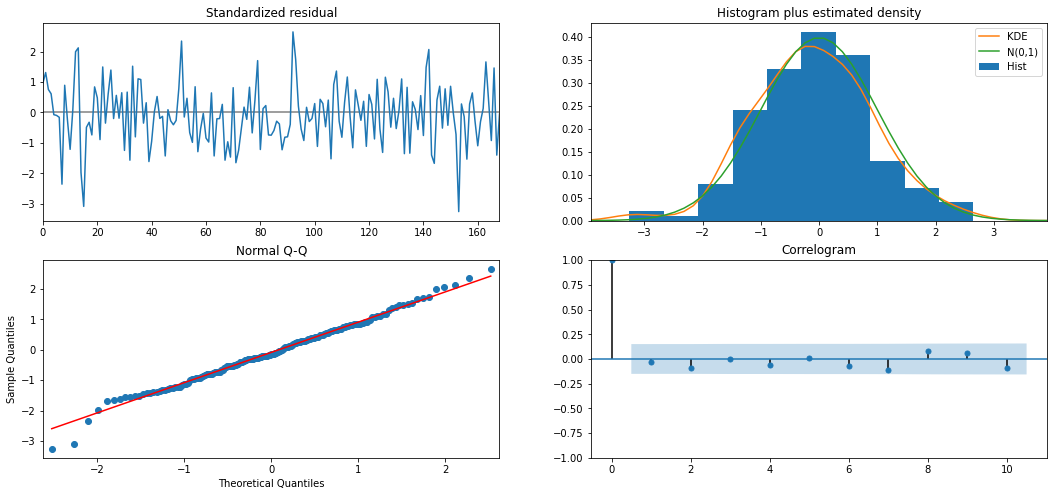

In [22]:
sx1model.plot_diagnostics(figsize=(18,8))
plt.show()

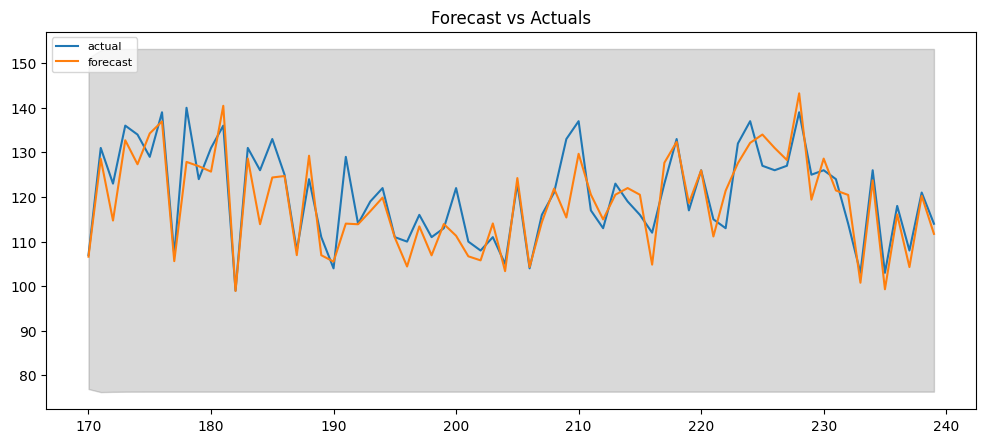

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  


{'Rsquare': 0.7837779282237441,
 'corr': 0.8853123337126532,
 'mae': 3.9307190165444896,
 'mape': 0.03190514466065914,
 'me': -1.6409456331837975,
 'minmax': 0.03154895645462097,
 'mpe': -0.013018996353531972,
 'rmse': 5.242521544391411}

In [23]:
# Forecast
n_periods = 70
fc, confint = sx1model.predict(n_periods=n_periods, exogenous=df[['T - 1', 'T - 2', 'T - 3']][170:240], return_conf_int=True)

# Make as pandas series
fc_series = pd.Series(fc, index=df_test.index)
lower_series = pd.Series(conf[:, 0], index=df_test.index)
upper_series = pd.Series(conf[:, 1], index=df_test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)

plt.plot(df_test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series,
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

# Accuracy metrics
forecast_accuracy(fc, df_test)

# With T-1 to T-10 (10 days in advance)

In [38]:
# SARIMAX Model without any seaonality
sx5model = pm.auto_arima(df_train, exogenous=df[['T - 1', 'T - 2', 'T - 3','T - 4','T - 5','T - 6','T - 7', 'T - 8', 'T - 9', 'T - 10']][:170],
                      start_p=1, start_q=1,      
                      max_p=3, max_q=3, # maximum p and q
                      m=52,             # frequency of series
                      d=None,         
                      seasonal = False,
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(sx5model.summary())

/usr/local/lib/python3.7/dist-packages/pmdarima/arima/_validation.py:62: UserWarning: m (52) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=994.002, Time=1.32 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1098.357, Time=0.16 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1067.944, Time=0.44 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.96 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1096.357, Time=0.24 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=993.504, Time=1.10 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1035.101, Time=0.78 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=993.866, Time=1.20 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=990.267, Time=1.29 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.23 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=989.199, Time=1.33 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=1.46 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=989.699, Time=1.33 sec
 ARIMA(3,1,2)(0,0,0)[0]             : AIC=989.615, Time=1.35 sec

Best model:  ARIMA(3,1,2)(0,0,0)[0] intercept
Total fi

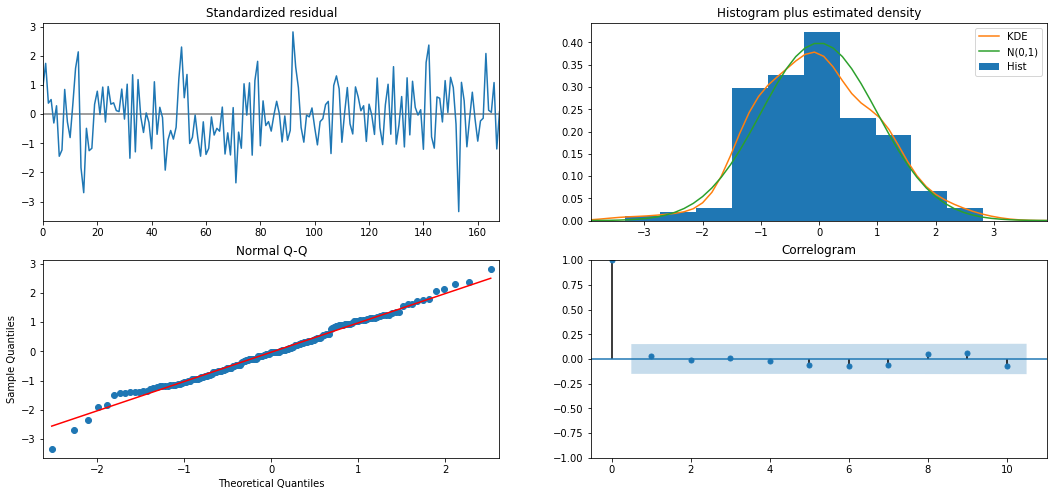

In [39]:
sx5model.plot_diagnostics(figsize=(18,8))
plt.show()

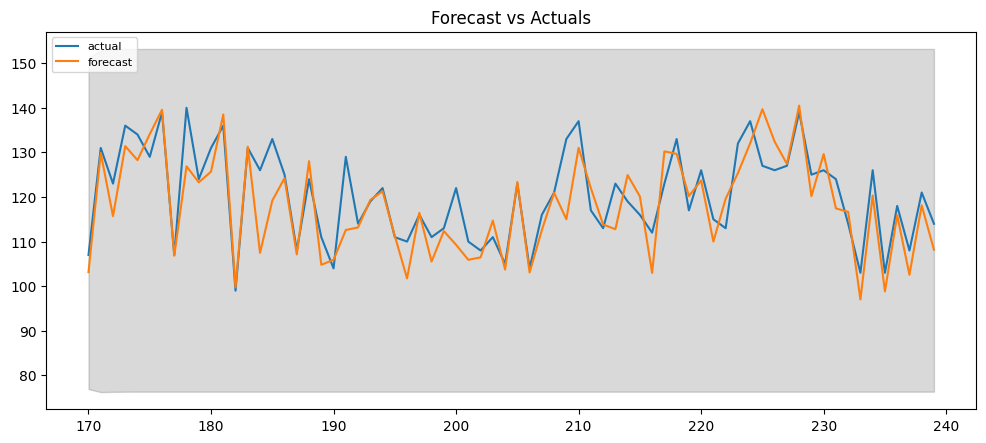

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  


{'Rsquare': 0.7210259685439567,
 'corr': 0.8491324799723284,
 'mae': 4.680931989900387,
 'mape': 0.038254629888545666,
 'me': -2.3829981661478783,
 'minmax': 0.03782656348478819,
 'mpe': -0.019264370357159066,
 'rmse': 6.347602477423324}

In [40]:
# Forecast
n_periods = 70
fc, confint = sx5model.predict(n_periods=n_periods, exogenous=df[['T - 1', 'T - 2', 'T - 3','T - 4','T - 5','T - 6','T - 7', 'T - 8', 'T - 9', 'T - 10']][170:240], return_conf_int=True)

# Make as pandas series
fc_series = pd.Series(fc, index=df_test.index)
lower_series = pd.Series(conf[:, 0], index=df_test.index)
upper_series = pd.Series(conf[:, 1], index=df_test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)

plt.plot(df_test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series,
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

# Accuracy metrics
forecast_accuracy(fc, df_test)

# With T-1 to T-7 (7 days in advance)

In [35]:
# SARIMAX Model without any seaonality
sx4model = pm.auto_arima(df_train, exogenous=df[['T - 1', 'T - 2', 'T - 3','T - 4','T - 5','T - 6','T - 7']][:170],
                      start_p=1, start_q=1,      
                      max_p=3, max_q=3, # maximum p and q
                      m=52,             # frequency of series
                      d=None,         
                      seasonal = False,
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(sx4model.summary())

/usr/local/lib/python3.7/dist-packages/pmdarima/arima/_validation.py:62: UserWarning: m (52) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.86 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1101.974, Time=0.14 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1066.685, Time=0.21 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.79 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1099.975, Time=0.17 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1040.686, Time=0.43 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=1033.795, Time=0.55 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=999.030, Time=1.02 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=997.044, Time=0.97 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.89 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.08 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=997.244, Time=0.92 sec

Best model:  ARIMA(2,1,1)(0,0,0)[0] intercept
Total fit time: 9.084 seconds
                               SARIMAX Results    

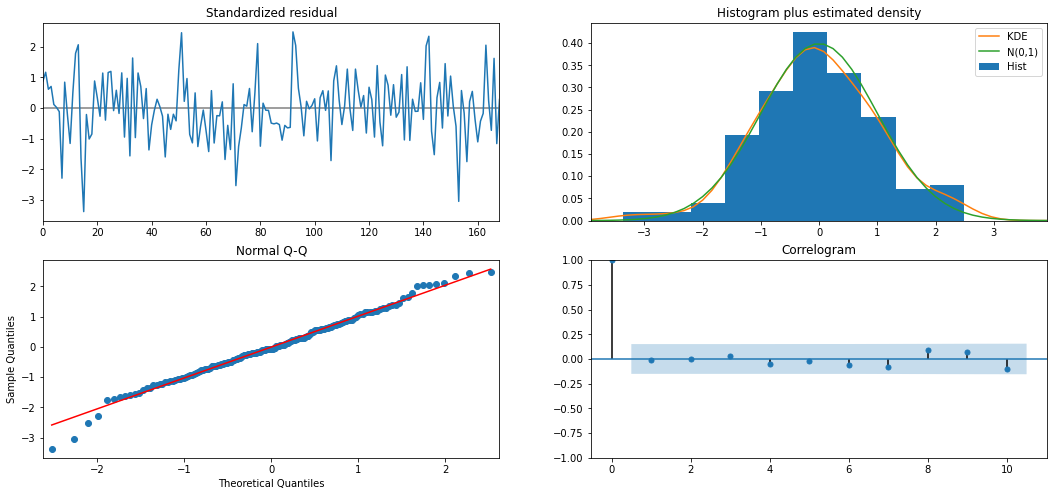

In [36]:
sx4model.plot_diagnostics(figsize=(18,8))
plt.show()

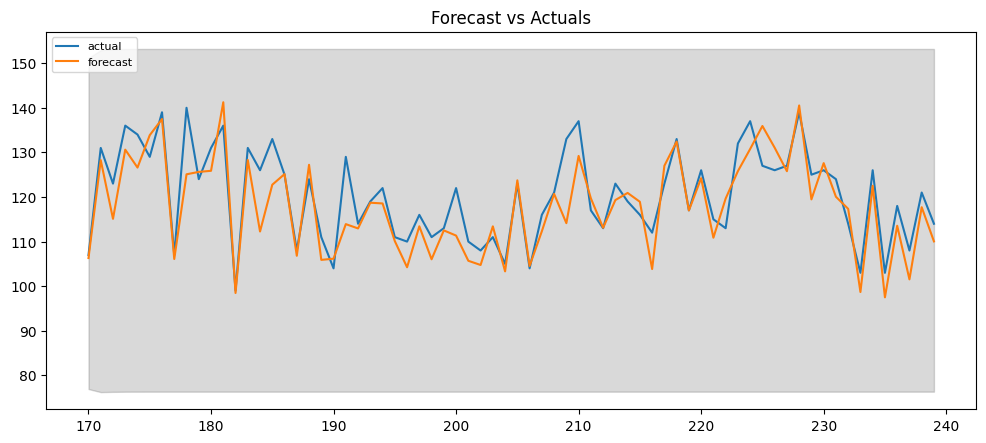

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  


{'Rsquare': 0.7755891400669418,
 'corr': 0.8806753885893155,
 'mae': 4.252263947983909,
 'mape': 0.03459142652212325,
 'me': -2.547814854974162,
 'minmax': 0.034340842269913185,
 'mpe': -0.020591795242748085,
 'rmse': 5.690889737383381}

In [37]:
# Forecast
n_periods = 70
fc, confint = sx4model.predict(n_periods=n_periods, exogenous=df[['T - 1', 'T - 2', 'T - 3','T - 4','T - 5','T - 6','T - 7']][170:240], return_conf_int=True)

# Make as pandas series
fc_series = pd.Series(fc, index=df_test.index)
lower_series = pd.Series(conf[:, 0], index=df_test.index)
upper_series = pd.Series(conf[:, 1], index=df_test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)

plt.plot(df_test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series,
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

# Accuracy metrics
forecast_accuracy(fc, df_test)

# With T-1 to T-5 (5 days in advance)

In [24]:


# SARIMAX Model without any seaonality
sx2model = pm.auto_arima(df_train, exogenous=df[['T - 1', 'T - 2', 'T - 3','T - 4','T - 5']][:170],
                      start_p=1, start_q=1,      
                      max_p=3, max_q=3, # maximum p and q
                      m=52,             # frequency of series
                      d=None,         
                      seasonal = False,
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(sx2model.summary())

/usr/local/lib/python3.7/dist-packages/pmdarima/arima/_validation.py:62: UserWarning: m (52) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.73 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1110.707, Time=0.10 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1073.245, Time=0.17 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.68 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1108.708, Time=0.16 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1048.298, Time=0.40 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=1042.194, Time=0.39 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.89 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.80 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=1040.201, Time=0.30 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=1046.299, Time=0.25 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=1003.426, Time=0.78 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=1001.426, Time=0.67 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1001.255, Time=0.32 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=999.506, Ti

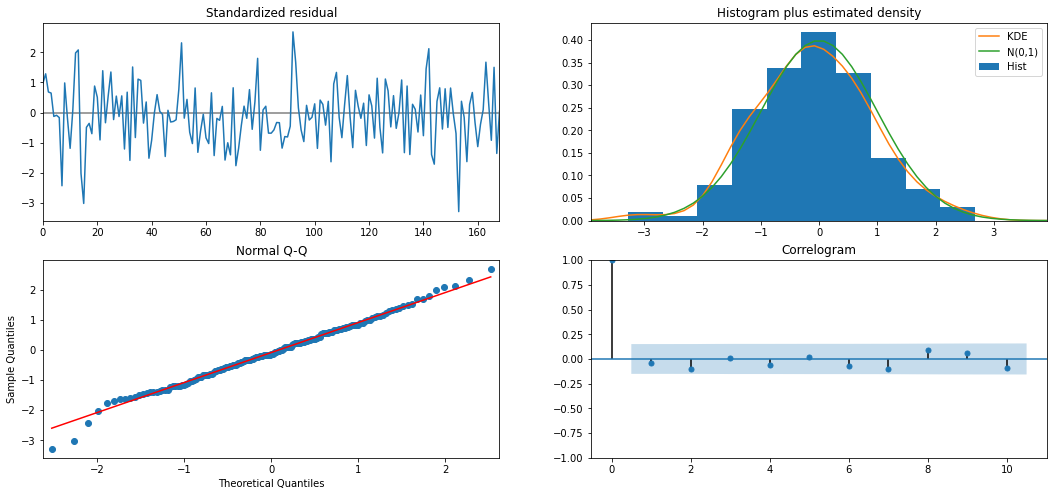

In [25]:
sx2model.plot_diagnostics(figsize=(18,8))
plt.show()

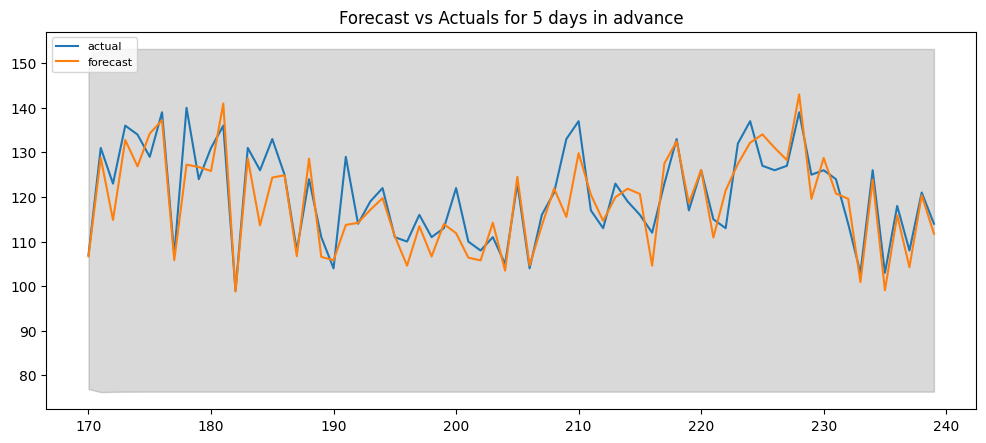

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  


{'Rsquare': 0.7825655235503176,
 'corr': 0.8846273359727912,
 'mae': 3.960918243044278,
 'mape': 0.032171600131507085,
 'me': -1.674673760275643,
 'minmax': 0.031826989540564954,
 'mpe': -0.01329800785394367,
 'rmse': 5.2687585316569665}

In [41]:
# Forecast
n_periods = 70
fc, confint = sx2model.predict(n_periods=n_periods, exogenous=df[['T - 1', 'T - 2', 'T - 3','T - 4','T - 5']][170:240], return_conf_int=True)

# Make as pandas series
fc_series = pd.Series(fc, index=df_test.index)
lower_series = pd.Series(conf[:, 0], index=df_test.index)
upper_series = pd.Series(conf[:, 1], index=df_test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)

plt.plot(df_test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series,
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals for 5 days in advance')
plt.legend(loc='upper left', fontsize=8)
plt.show()

# Accuracy metrics
forecast_accuracy(fc, df_test)

# With T-1 to T-2 (2 days in advance)

In [27]:


# SARIMAX Model without any seaonality
sx3model = pm.auto_arima(df_train, exogenous=df[['T - 1', 'T - 2']][:170],
                      start_p=1, start_q=1,      
                      max_p=3, max_q=3, # maximum p and q
                      m=52,             # frequency of series
                      d=None,         
                      seasonal = False,
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(sx3model.summary())

/usr/local/lib/python3.7/dist-packages/pmdarima/arima/_validation.py:62: UserWarning: m (52) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.53 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1110.528, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1072.848, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.44 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1108.529, Time=0.12 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1049.256, Time=0.19 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=1041.556, Time=0.19 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.65 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.53 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=1039.560, Time=0.13 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=1047.256, Time=0.12 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=1001.405, Time=0.30 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=999.487, Time=0.20 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=999.444, Time=0.19 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=997.580, Time

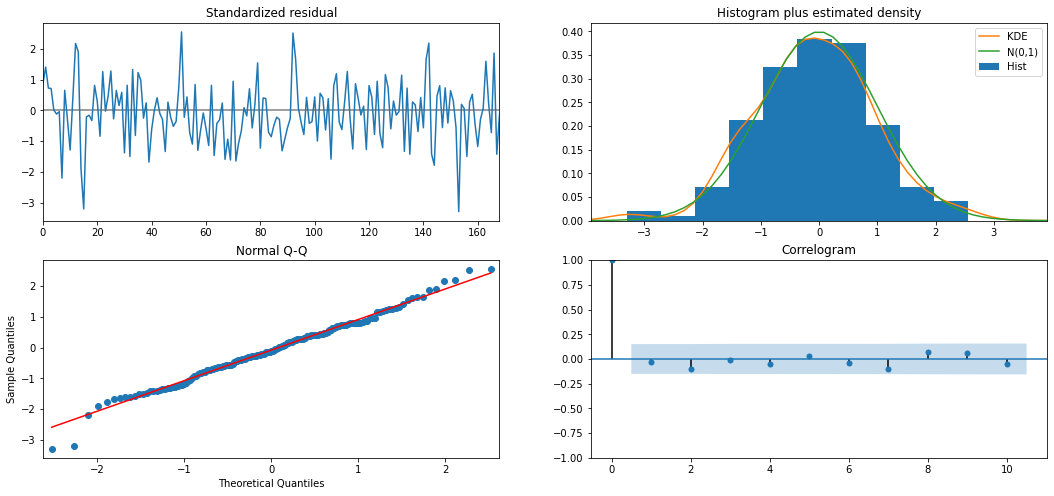

In [28]:
sx3model.plot_diagnostics(figsize=(18,8))
plt.show()

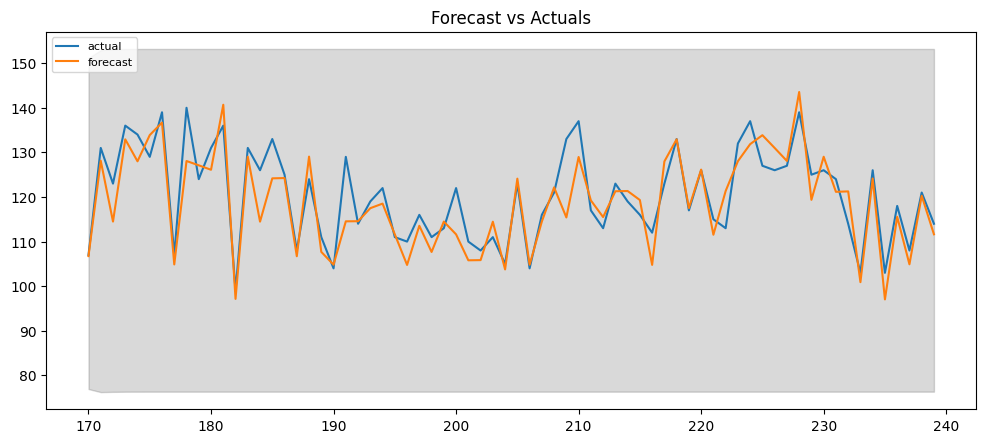

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  


{'Rsquare': 0.7886974170014432,
 'corr': 0.8880863792455345,
 'mae': 3.934997607311319,
 'mape': 0.03203035625875195,
 'me': -1.6522918691919768,
 'minmax': 0.03167850680316353,
 'mpe': -0.013197277030478564,
 'rmse': 5.210243638083554}

In [29]:
# Forecast
n_periods = 70
fc, confint = sx3model.predict(n_periods=n_periods, exogenous=df[['T - 1', 'T - 2']][170:240], return_conf_int=True)

# Make as pandas series
fc_series = pd.Series(fc, index=df_test.index)
lower_series = pd.Series(conf[:, 0], index=df_test.index)
upper_series = pd.Series(conf[:, 1], index=df_test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)

plt.plot(df_test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series,
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

# Accuracy metrics
forecast_accuracy(fc, df_test)